In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np

#image scanner
import matplotlib.image as mpimg

class DataLoader():
    def __init__(self):
        self.genuine_images=[]
        self.forged_images=[]
    
    def load(self):
        #loading 5 test images
        for folder_path in glob.glob('data/Train/*'):
            counter=0
            signer_genuine=[]
            signer_forged=[]
            for img_path in glob.glob(folder_path + '/*.png'):
                if img_path.find("Genuine") != -1:
                    signer_genuine.append(mpimg.imread(img_path))
                if img_path.find("Forged") != -1:
                    signer_forged.append(mpimg.imread(img_path))
            self.genuine_images.append(signer_genuine)
            self.forged_images.append(signer_forged)
            
    def getGenuine(self):
        return self.genuine_images
    
    def getForged(self):
        return self.forged_images
    

In [2]:
loader = DataLoader()
loader.load()
genuine_images = loader.getGenuine()
forged_images = loader.getForged()

len(genuine_images)

3

<class 'numpy.ndarray'>


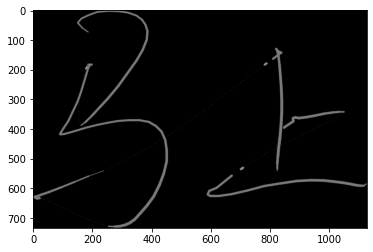

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img = genuine_images[2][2]

print(type(img))

gray = rgb2gray(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [4]:
def createPairs():
    genuine_pairs = []
    forged_pairs = []
    pair =[]
    for signer in range(len(genuine_images)):
        for i in range(len(genuine_images[signer])-1):
            for j in range(i+1,len(genuine_images[signer])):                         
                genuine_pairs.append([genuine_images[signer][i],genuine_images[signer][j]])
                
    for signer in range(len(genuine_images)):
        for i in range(len(genuine_images[signer])):
            for j in range(len(forged_images[signer])):
                forged_pairs.append([genuine_images[signer][i],genuine_images[signer][j]])
                pair.append((i,j))
    
    return genuine_pairs,forged_pairs

genuine_pairs,forged_pairs = createPairs()

print(type(genuine_pairs[1][1]))
img = genuine_pairs[1][0]


<class 'numpy.ndarray'>


In [6]:
import csv

filename = "data/genuine_genuine_data.csv"
    
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile)  
        
    csvwriter.writerows(genuine_pairs)

filename = "data/genuine_forged_data.csv"
    
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile)  
        
    csvwriter.writerows(forged_pairs)   
    